### PA602/PA2605/PA2606: Intermediate Climate Science
# Computer Workshop 1

#### Todays Objectives:
1. Introduce you to the Jupyter environment
2. learn how to put together basic workflow to analyse data
3. Gain experience working with blocks of python code
4. Use knowledge from our last lecture to interpret results 

#### Python Libraries
For all our computer workshsops we will work with four python libraries:
1. **NumPy** (https://numpy.org/): _"NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more"_. We will use this for most of our math functions
2. **SciPy** (https://scipy.org/): _"SciPy is a collection of mathematical algorithms and convenience functions built on NumPy . It adds significant power to Python by providing the user with high-level commands and classes for manipulating and visualizing data"_.This is the other library we wil use for statistical/algorithmic functions.
3. **NetCDF4** (https://unidata.github.io/netcdf4-python/): The Network Common Data Form (NetCDF) is specific scientific data format used in climate and earth observation sciences. Each variable is stored in a compressed format along with accompanying meta data. The majority of data you will use in this course wil be stored in this format.
4. **Matplotlib** (https://matplotlib.org/): _"Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible"_. We will use this library to visualise the contents of data files and the results from the analyses we perform on these data.


### Basic workflow for todays session
When we are designing our workflow within a Jupyter notebook, we are splitting this task in to four simple steps.   

![basic workflow](img/basic_workflow_cw1_pa260.png)

#### Step 1: Collect some data
Our first step is to collect some, now this could involve conducting an experiment/making measurements or downloading exisiting datasets. In this workshop you will be working with some exisiting data from the IPCC's 6th Coupled model Intercomparison Project (CMIP6), specifically output from the Coordinated Regional Climate Downscaling Experiment (CORDEX). Specifically we are using results for two cases of the Representative Common Pathway (RCP) scenario experiment. 

![rcp_cmip5_emissions](img/rcp_cmip5_emissions.png)

The figure above shows the compatible fossil fuel emissions simulated by CMIP5 (previous CMIP exersise) models for the four RCP scenarios (PgC/yr). Dashed lines represent the historical estimates and RCP emissions calculated by the Integrated Assessment Models (IAMs) used to define the RCP scenarios, whereas the solid lines and plumes show results from the actual CMIP5 Earth System Models (AR5). In this workshop you will work with results from the UK Met Office (UKMO) HadGEM2 model for the RCP2.6 and RCP8.5 scenarios over the UK between December 1959 to December 2099. These two files are named:
- cmip6_cordex_tas_MOHC-HadGEM2-ES_rcp2.6_r1i1p1_v1_mon_195112_209912.nc
- cmip6_cordex_tas_MOHC-HadGEM2-ES_rcp8.5_r1i1p1_v1_mon_195112_209911.nc

To examine the performance of the model results we also want to consider what is happening in the real world. For this we will include another data set from the European Cemctre For Medium Range Forcasting (ECMWF), which produce a product known as reanalysis (mix of weather model and observations using a process called data assimilation). The ERA5 reanalysis is their latest product, and we can use them as observations and the corresponding data can be found in the following file:
- era5_tas_ECMWF_IFS_mon_195912_202412.nc

These data files contain the following variables:
1. Longitude (longitude) in degrees East (i.e. between -180 and 180 degrees)
2. Latitude (latitude) in degrees North (i.e. between -90 and 90 degrees)
3. Fractional year (time) in decimal years (e.g. 1959.0416, 1959.125 , 1959.2084, ...)
4. Near-surface air temperature (tas) for and UK and Ireland in Kelvin 

#### Step 2: Read in to memory
You will notice that at of the file, the format is specified as 'nc'. This tells you that these are NetCDF files, for which Python has the library netcdf4. **Note**: There are other libraries that can read this file format (e.g. xarray); however, we will always use netCDF4 for simplicity. On the University program installer you can also find Panoply (https://www.giss.nasa.gov/tools/panoply/) which also be used view the contents NetCDF files and make some basic plots in a GUI interface. Really useful to find out whats inside the variable names/dimenions etc, though has limited functionality.  

#### Step 3: Apply some process
In this exersise we are going to go through four seperate tasks to understand the data and apply simple analysis methods to evaluate potential furture warming over the UK:
1. Examine 30 year average surface air temperatures for both RCP scenarios between 1960 and 2080.
2. Calculate a timeseries of (latitude) weighted monthly mean surface air temperatures anomolies.
3. Apply a simple moving average filter to our new time series data.
4. Compare distributions surface air temperature prioir to 2005 (historical emissions) to post 2005 (RCP scenario) and examine how these consistent cvalculated probability density function (PDF) is to the raw data.

#### Step 4: Visulaise the result
Finally, you will make three distinct plots using the Matplolib library:
1. Multi-panel plot of 30 year average surface air temperatures, using a colormap to differentiate between warmwer and colder areas.
2. A time series plot of smoothed surface air temperatures.
3. Histogram/PDF plot of historical, RCP2.6, and RCP8.5 temperature anomoly distributions

### Step 5: Scientific inference
Now you might be saying to yourself, 'I thought it was only 4 step?' Now you would be correct; however, step 5 is the most important. Technically its not part of the coding work flow but it was actually the motovation for the previous 4 steps. The reason we are processing this data is we want to be able to say something about what it shows us, which coulld quantitative and/or qualitative in nature.

A short quiz accompanies this workshop, please refer to the corresponding workshop lecture notes for details.

## Lets begin
First we will start with importing the Python libraries needed

In [1]:
""" import libraries, modules and functions needed required. """
import numpy as np              # here we shorten numpy to np for ease when writing the code (very common practice)
from scipy.stats import norm    # here we are importing only the function we need
import netCDF4
import matplotlib.pyplot as plt # here we are importing the pyplot module within Matplotlib

## Now lets write all the functions we will use in this analysis

#### function: read_gridded_data
We will use this function to read in the climate model data into memory using the netCDF4 library

In [2]:
def read_gridded_data(filename, report=True):
    """ function to read regular gridded data files and return a Python dictionary.
    inputs: filename -> name of file to be read
            report   -> boolean flag, if true then a table listing the file contents is printed to screen

    outputs: data    -> a python dictionary containing the file contents
    """
    # open the file and map the contents to a netCDF object. Use a test to capture
    # any issues with the data file
    try:
        nc = netCDF4.Dataset(filename,"r")
    except IOError:
        raise
    # if report is set to true then prind global attributes
    if report == True:
        print(f"Global Attributes For File: {filename}") # when witing strings, starting them with an 'f' allows you to insert other variables using {}.
        print("----------------------------------------------------------------------------------------------------")
        print(nc)
    # Define a dictionary to hold the contents
    data = {} 
    # loop over the file contents and write
    if report == True:
        # what variables are in this file?
        # printing Aligned Header 
        print("-------------------------------------------------------------------")        
        print(f"{'Variable Name' : <14} |{'Long Name':<32} |{'tdim, ydim, xdim':>17}") 
        print("-------------------------------------------------------------------")
    else:
        pass # we add a pass so we can close this if statement with an else

    for varname in nc.variables.keys():
        if report == True:
            print(f"{varname:<14} |{nc[varname].long_name:<32} |{', '.join([str(d) for d in nc[varname].shape]):>17}")
        else:
            pass
        # write the variable to the dictionary
        data[varname] = nc[varname][:] #  the [:] at the end indexes all the data
    
    # finally close the file
    nc.close()

    # return the filled data dictionary
    return data

#### function **calculate_anomaly_timeseries**

In [3]:
def calculate_anomaly_timeseries(rcp):
    """ calculate global weighted mean time series of tas. 
    inputs: rcp -> a dictionary containing variables, lon, lat, time, and tas
    output: anom -> anomaly time series length time
            date -> fractional year (1960 to 2080)
    """
    # First, we find the correct temporal range in the data
    find = np.where((rcp['time'] >= 1959)&(rcp['time'] < 2081))
    years = rcp['time'][find]
    # Next, we calculate a weighted mean time series
    ts = np.full(find[0].size,np.nan) 
    
    # create weights -> cosine(latitude)
    lat2d, lon2d = np.meshgrid(rcp['longitude'], rcp['latitude'])
    del lon2d
    wgts = np.cos(np.radians(lat2d))
    del lat2d
    for tt, grid in enumerate(rcp['tas'][find[0],:,:]):
        ts[tt] = np.sum(grid*wgts)/np.sum(wgts)

    # Now we calculate the anomaly
    anom = np.full(ts.size,np.nan)
    find = np.where((rcp['time'] >= 1960)&(rcp['time'] < 1990)) # 30 yr reference period
    for mth in range(12):
        anom[mth::12] = ts[mth::12] - np.mean(ts[find][mth::12])
    
    return years, anom

#### function: **simple_moving_average**

In [4]:
def simple_moving_average(yvals, width):
    """ compute the moving average of a time series with a user defined sliding window.
    inputs: yvals -> time series on regular time steps
            width -> width of sliding window (n time steps)
    output: sommothed time series
    """
    return np.convolve(yvals, np.ones(width), 'same')/width

#### function: **calculate_probDensFunc**

In [5]:
def calculate_probDensFunc(yvals, ymin, ymax,nbins=100):
    """ calculate a PDF from the array yvals using scipy.stats norm module
    inputs: yvals -> 1d array of values to be used in PDF calculation
            ymin  -> minimum value for range of yvals PDF is calculated
            ymax  -> maximum value for range of yvals PDF is calculated
            nbins -> number of bins for which PDF is calculated between ymin  and ymax
            
    outputs: xvals -> array of values over which the PDF was calculated (defined by ymin, ymax,nbins)
             PDF   -> array containing PDF values
    """
    # define xvals
    xvals = np.linspace(ymin,ymax,nbins)

    # calculate mean and standard deviation of yvals
    mu = np.mean(yvals)
    std = np.std(yvals)

    # define an empty array to hold PDF values. Here we use the size method to tell the code how many elements 
    # are in this new array and fill each entry with a default value NaN (Not a Number)
    PDF = np.full(xvals.size, np.nan)

    # loop over each value in x and calculate the corresponding PDF value. Because xvals is an array merans in 
    # Python it is iterable (i.e. we can loop over the contents) and by wrapping it in the enumerate function
    # we also get the index of the value (e.g. the firts value in xvals could be -2, therefore x=-2 and ii=0).
    for ii, x in enumerate(xvals):
        PDF[ii] = norm.pdf(x, loc=mu, scale=std)

    # return the results
    return PDF, xvals

#### funtion: plot_thirty_year_average


In [6]:
def plot_thirty_year_average_tas(rcp26, rcp85, output=False):
    """ This function will plot 8 panels (4x2) of average near-surface air temperatures for:
        a) 1960 to 1989, 
        b) 1990 to 2019, 
        c) 2020 to 2049, and 
        d) 2050 to 2079
        inputs: rcp26  -> a python dictionary containing the RCP2.6 data over the UK
                rcp85  -> a python dictionary containing the RCP8.5 data over the UK
                output -> a boolean flag that either plots the results within the jupyter notebook (false) or creates a .pdf image (True)

        outputs: 8 panel plot
    """
    # define the temporal periods for avaeraging
    periods = [[1960,1989],
               [1990,2019],
               [2020,2049],
               [2050,2079]]
    
    # initalise the figure and setup the size (figsize) and resolution (dpi -> dots per square inch)
    plt.figure(num=1,figsize=(9.5,4),dpi=300)

    # define the plot colours and number of intervals. Here we are using the magma colormap
    pcols = plt.get_cmap('magma',15)

    # loop over each time period and filter results for the specified time band
    for ii, time_bnds in enumerate(periods):
        # use the where function to find a points with the time bounds for the RCP 2.6 data. 
        # The indicies of these points are held in the variable find, which is and array 
        # (mutable) within a tuple (immutable).
        find = np.where((rcp26['time'] >= time_bnds[0])&(rcp26['time'] < time_bnds[1]+1)) # we add 1 to the upper band as we want all points
                                                                                          # within that year, e.g. 1989 so we want years < 1990

        # index the subplot frame we are plotting the data too. Because this is the RCP2.6 data 
        # we will put it on the top row, index values 1-4.Note: the counter ii starts from 0 so 
        # we have to add 1 to ii (ii+1) to index the frame correctly.
        plt.subplot(2,4,ii+1)
        
        # here the plotting method pcolormesh is used to cread the plot. We provide the the x coordinates
        # (rcp26['lon']) and y coordinates (rcp26['lat']) as well as applying the find variable to the 
        # near-surface air temperature (rcp26['tas'][find[0],:,:]) and taking the mean along the time axis
        # (e.g. np.mean(3d_data, axis=0) where axis=0 is the time dimension). Finally we convert from K to 
        # deg C (-273.15). The plot will set the color range between 0-15 deg C using the colormap defined
        # above (pcols).
        plt.pcolormesh(rcp26['longitude'],rcp26['latitude'],
                       np.mean(rcp26['tas'][find[0],:,:],axis=0)-273.15,
                       vmin=0, vmax=15,cmap=pcols)
        
        # we add a colrbar so we can interpret the scale
        plt.colorbar()
        # add a title to the plot so we know which RCP scenario it is and 
        # time span over which the data has been averaged.
        plt.title(f"RCP2.6 TAS {time_bnds[0]} to {time_bnds[1]}",fontsize=8)
   
    
        # use the where function to find a points with the time bounds for the RCP 8.5 data. 
        # The indicies of these points are held in the variable find, which is and array 
        # (mutable) within a tuple (immutable)
        find = np.where((rcp26['time'] >= time_bnds[0])&(rcp26['time'] < time_bnds[1]+1))

        # index the subplot frame we are plotting the data too. Because this is the RCP8.5 data 
        # we will put it on the bottom row, index values 5-8.Note: the counter ii starts from 0 so 
        # we have to add 5 to ii (ii+5) to index the frame correctly.
        plt.subplot(2,4,ii+5)

        # we apply the same code used above for plotting the RCP2.6 data for the RCP8.5 data
        plt.pcolormesh(rcp85['longitude'],rcp85['latitude'],
                       np.mean(rcp85['tas'][find[0],:,:],axis=0)-273.15,
                       vmin=0, vmax=15,cmap=pcols)
        
        # we add a colrbar so we can interpret the scale
        plt.colorbar()
        # add a title to the plot so we know which RCP scenario it is and 
        # time span over which the data has been averaged.
        plt.title(f"RCP8.5 TAS {time_bnds[0]} to {time_bnds[1]}",fontsize=8)

    # now we have plotted all the data we use the tight_layout() command to optimise the
    # the layout of plots wiithin the whole figure.
    plt.tight_layout()

    # finally we test to see whether the figure will be saved as an .pdf file or rather 
    # just plotted within the notebook.
    if output == True:
        # save the figure with a descriptive name
        plt.savefig("cmip6_cordex_mohc_rcp2.6_rcp8.5_30yr_av_tas.pdf")
        plt.close()
    else:
        # just plot to screen
        pass
        


#### function: **plot_tas_timeseries**

In [7]:
def plot_tas_timeseries(frac_year, frac_year_era5, anom_sma_rcp26, anom_sma_rcp85, anom_sma_era5,hist,futr, output=False):
    """
    inputs: frac_year      -> fractional year array for model time series
            frac_year_era5 -> fractional year for ERA5 reanalysis (observations)
            anom_sma_rcp26 -> smoothed near-surface air temperature anomoly timeseries for RCP2.5 scenario
            anom_sma_rcp85 -> smoothed near-surface air temperature anomoly timeseries for RCP8.5 scenario
            anom_sma_era5  -> smoothed near-surface air temperature anomoly timeseries for ERA5 reanalysis
            hist           -> index array for historical period in model time series
            futr           -> index for future emssion scenario period in odel time series

    output: 
    """
    plt.figure(figsize=(7,3),dpi=300)
    plt.plot(frac_year[hist], anom_sma_rcp26[hist], lw=2, color='#A8AAB7',label='Historical')       # hex colour code
    plt.plot(frac_year[futr], anom_sma_rcp26[futr], lw=2, color="#00A7B5", label='RCP2.6')          # hex colour code 
    plt.plot(frac_year[futr], anom_sma_rcp85[futr], lw=2, color="#F84C4F", label='RCP8.5')          # hex colour code
    plt.plot(frac_year_era5, anom_sma_era5, lw=1.5, color='#58565D', label='ERA5')                  # hex colour code
    
    plt.legend(loc=2,fontsize=8)
    plt.ylim(-1.5,4.5)
    plt.ylabel(r"$\Delta$T [K]")
    plt.xlim(1960,2080)
    plt.xlabel("Year")
    plt.title("UK Weighted Mean Near-Surface Air Temperature\n Anomoly Timerseries (1960-2080)",fontsize=10)

    # finally we test to see whether the figure will be saved as an .pdf file or rather 
    # just plotted within the notebook.
    if output == True:
        # save the figure with a descriptive name
        plt.savefig("tas_mm_anom_timeseries_era5_mohc_rcp2.6_rcp8.5.pdf")
        plt.close()
    else:
        # just plot to screen
        pass


#### function: **plot_delta_tas_probDensFunc**

In [8]:
def plot_delta_tas_probDensFunc(xvals, hist_pdf,rcp26_pdf,rcp85_pdf,xvals_com, era5_pdf_com, rcp26_pdf_com, rcp85_pdf_com, output=False):
    """ function to plot PDF distributions
    inputs: xvals         ->
            hist_pdf      ->
            rcp26_pdf     ->
            rcp26_pdf     ->
            xvals_com     ->
            era5_pdf_com  ->
            rcp26_pdf_com ->
            rcp85_pdf_com ->
            
    output:
    """
    plt.figure(figsize=(9,4),dpi=300)
    plt.subplot(121)
    plt.plot(xvals, hist_pdf,lw=2,color='#A8AAB7',label='historical PDF (1960-2005)')
    plt.plot(xvals, rcp26_pdf,'--',lw=2,color="#00A7B5",label='RCP2.5 PDF (2005-2079)')
    plt.plot(xvals, rcp85_pdf,'-.',lw=2,color="#F84C4F",label='RCP8.5 PDF (2005-2079)')
    plt.xlim(-2,5)
    plt.ylim(0,1.3)
    plt.legend(loc=1,fontsize=8)
    plt.ylabel("PDF",fontsize=12)
    plt.xlabel(r"$\Delta$T [K]",fontsize=12)
    #plt.title("UK Surface Air Temperature Anomolies")
    
    plt.subplot(122)
    plt.plot(xvals_com, era5_pdf_com, color="#58565D",lw=2,label=f'ERA5 PDF (2005-{int(frac_year_era5[-1])})')
    plt.plot(xvals_com, rcp26_pdf_com, '--',color="#00A7B5",lw=2,label=f'RCP2.5 PDF (2005-{int(frac_year_era5[-1])})')
    plt.plot(xvals_com, rcp85_pdf_com, '-.',color="#F84C4F",lw=2,label=f'RCP8.5 PDF (2005-{int(frac_year_era5[-1])})')
    plt.xlim(-2,5)
    plt.ylim(0,1.3)
    plt.legend(loc=1,fontsize=8)
    plt.ylabel("PDF",fontsize=12)
    plt.xlabel(r"$\Delta$T [K]",fontsize=12)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.suptitle("UK Monthly Mean Surface Air Temperature Anomolies Relative to 1960-1989 Average")

    # finally we test to see whether the figure will be saved as an .pdf file or rather 
    # just plotted within the notebook.
    if output == True:
        # save the figure with a descriptive name
        plt.savefig("tas_mm_anom_timeseries_era5_mohc_rcp2.6_rcp8.5.pdf")
        plt.close()
    else:
        # just plot to screen
        pass

## Lets perform the analysis

#### Step 1: collect some data

In [13]:
rcp26_filename = "data/cmip6_cordex_tas_MOHC-HadGEM2-ES_rcp2.6_r1i1p1_v1_mon_195112_209912.nc"
rcp85_filename = "data/cmip6_cordex_tas_MOHC-HadGEM2-ES_rcp8.5_r1i1p1_v1_mon_195112_209911.nc"
era5_filename = "data/era5_tas_ECMWF_IFS_mon_195912_202412.nc"

#### Step 2: read the data into memory

In [14]:
# read in the data
rcp26 = read_gridded_data(rcp26_filename,report=False)
rcp85 = read_gridded_data(rcp85_filename,report=False)
era5 = read_gridded_data(era5_filename, report=False)

#### Step 3: apply some process(es)

In [15]:
# step 3.1: calculate weighted mean near-surface temperature anomoly time series 
frac_year, anom_rcp26 = calculate_anomaly_timeseries(rcp26)
frac_year, anom_rcp85 = calculate_anomaly_timeseries(rcp85)
frac_year_era5, anom_era5 = calculate_anomaly_timeseries(era5)

# step 3.2: apply a simple 12 month moving average filter to our time series.
anom_sma_rcp26 = simple_moving_average(anom_rcp26,12)
anom_sma_rcp85 = simple_moving_average(anom_rcp85,12)
anom_sma_era5 = simple_moving_average(anom_era5,12)

# step 3.3: calculate PDFs of historical and RCP ime series information
hist = np.where((frac_year >= 1960)&(frac_year < 2005))
futr = np.where((frac_year >= 2005)&(frac_year < 2080))

hist_pdf, xvals = calculate_probDensFunc(anom_sma_rcp26[hist], -2, 5, nbins=100)
rcp26_pdf, xvals = calculate_probDensFunc(anom_sma_rcp26[futr], -2, 5, nbins=100)
rcp85_pdf, xvals = calculate_probDensFunc(anom_sma_rcp85[futr], -2, 5, nbins=100)

# step 3.4: do the same analysis for the common period shared by RCP scenarios and ERA5
comm = np.where((frac_year >= 2005)&(frac_year <= frac_year_era5[-1]))
e5cm = np.where(frac_year_era5 >= 2005)

era5_pdf_com, xvals_com = calculate_probDensFunc(anom_sma_era5[e5cm], -2, 5, nbins=100)
rcp26_pdf_com, xvals_com = calculate_probDensFunc(anom_sma_rcp26[comm], -2, 5, nbins=100)
rcp85_pdf_com, xvals_com = calculate_probDensFunc(anom_sma_rcp85[comm], -2, 5, nbins=100)

#### Step 4: Visualise the results

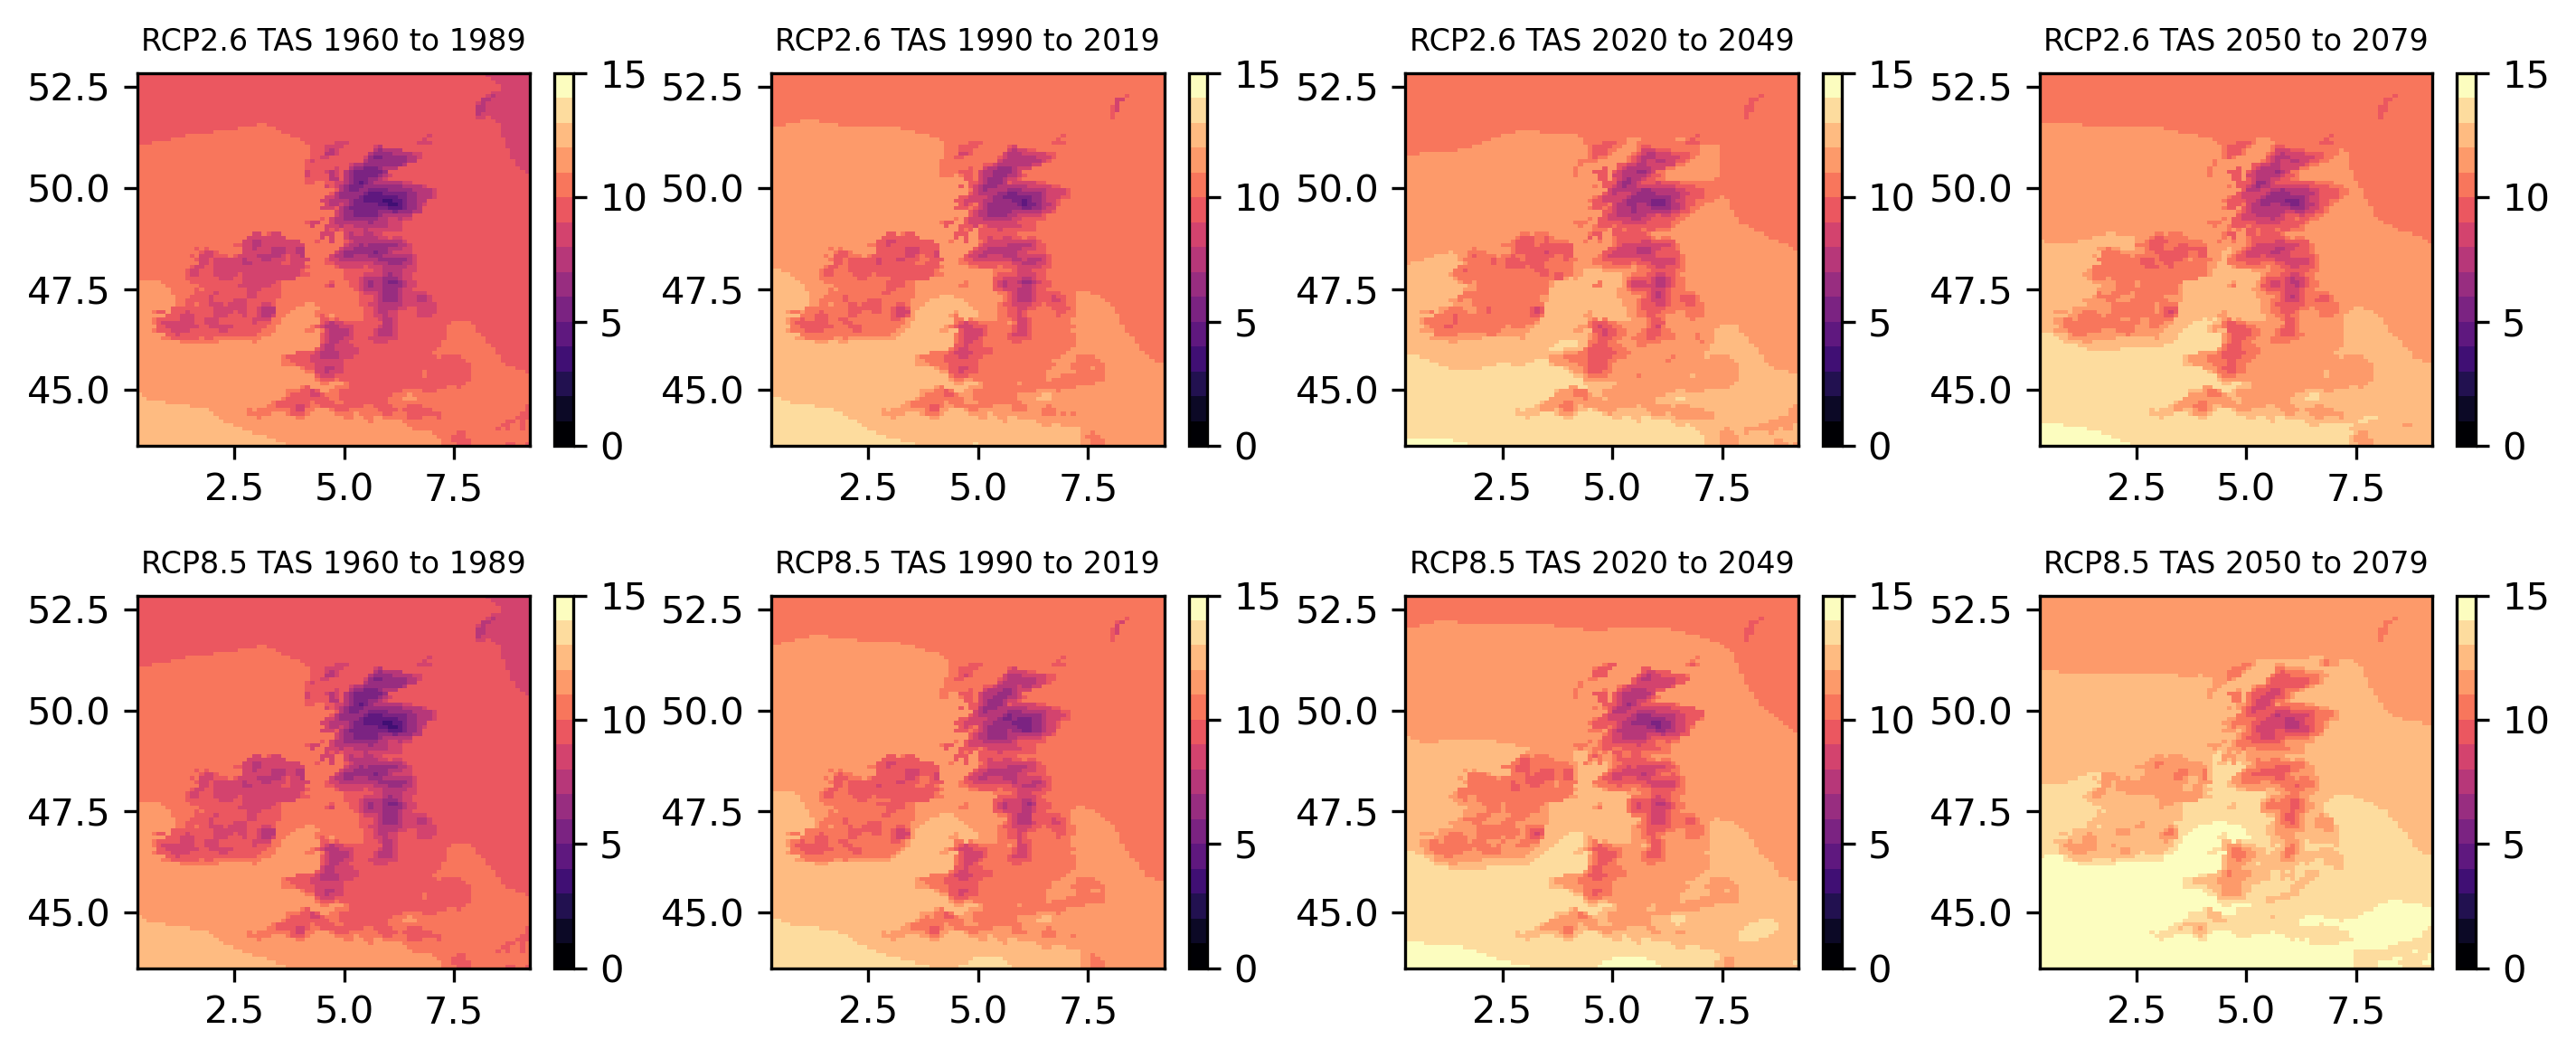

In [16]:
# plot 8 panel 30 year averages
plot_thirty_year_average_tas(rcp26, rcp85, output=False)

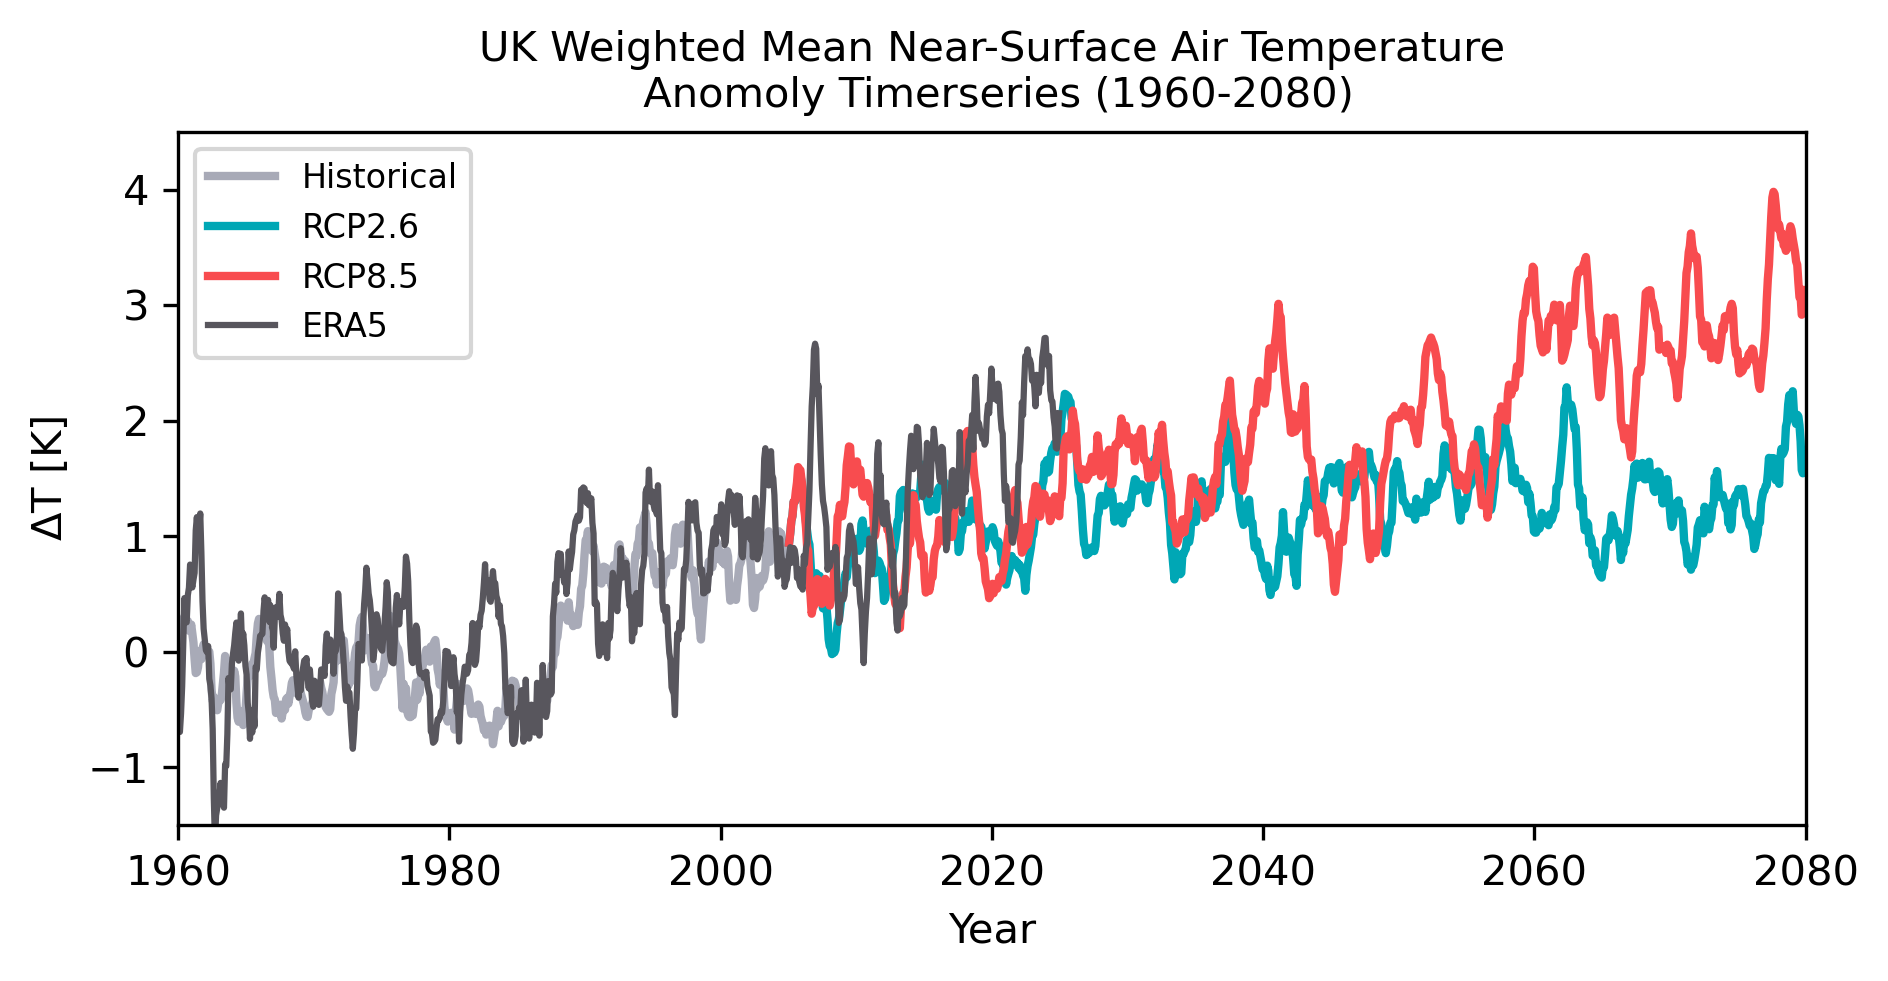

In [17]:
# plot time series of the data
plot_tas_timeseries(frac_year, frac_year_era5, anom_sma_rcp26, anom_sma_rcp85, anom_sma_era5,hist,futr, output=False)

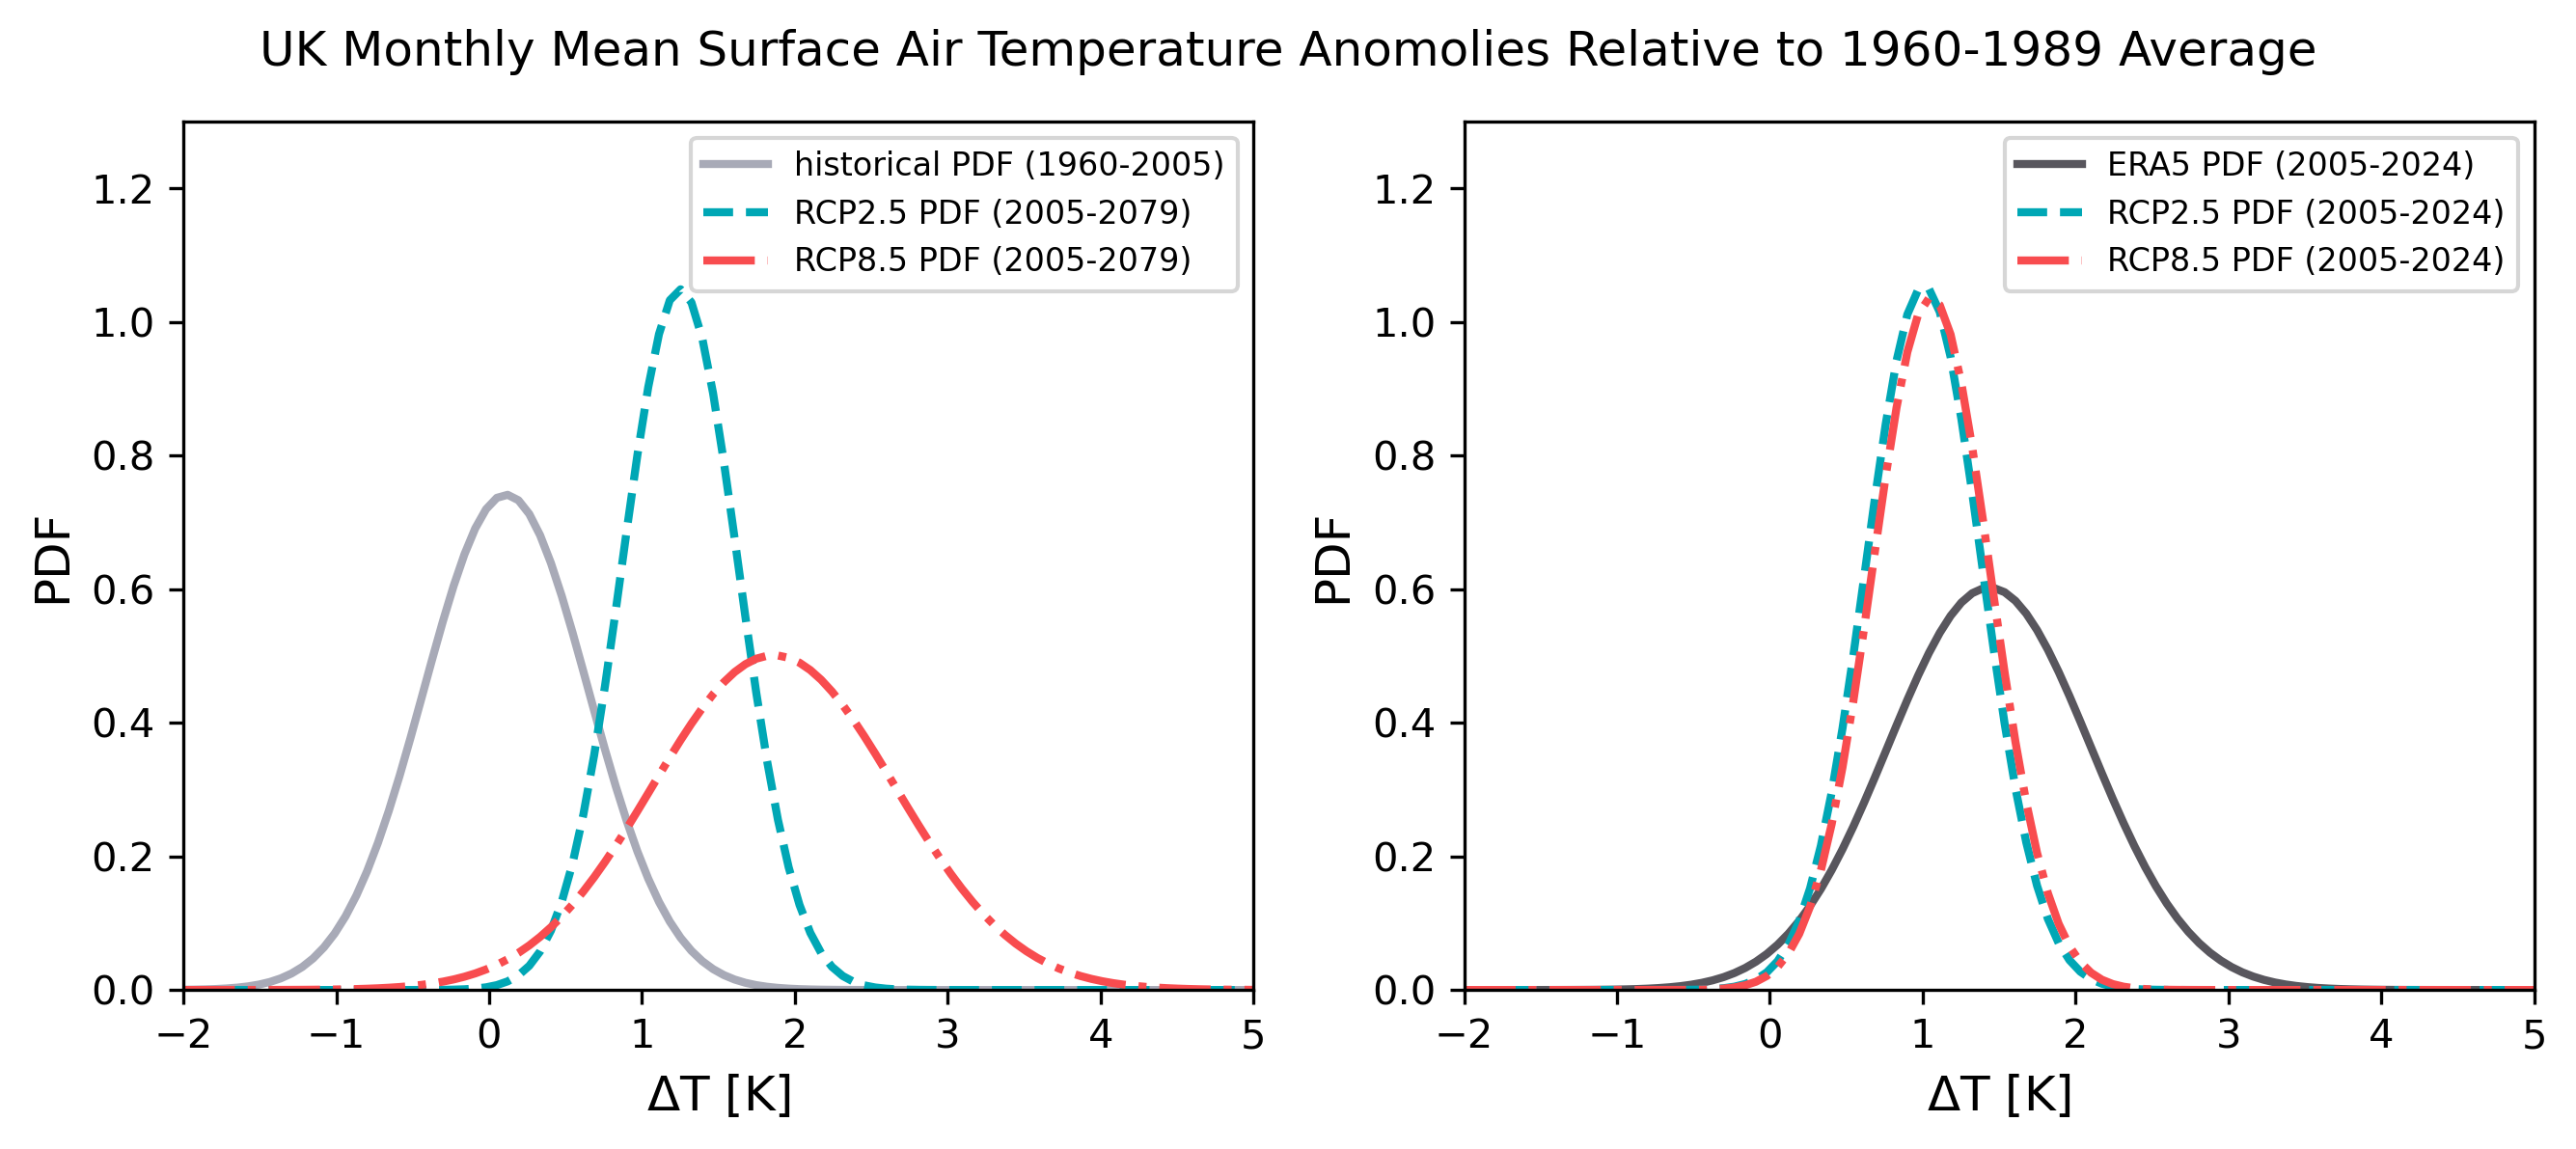

In [18]:
# plot PDF distributions for comparison
plot_delta_tas_probDensFunc(xvals, hist_pdf,rcp26_pdf,rcp85_pdf,xvals_com, era5_pdf_com, rcp26_pdf_com, rcp85_pdf_com)